# Problem Statement:

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

# Objective:
- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

### Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

## Import necessary libraries

In [353]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier

## Load and view the dataset

In [354]:
data=pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [355]:
data.shape

(10127, 21)

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are total 21 columns and 10127 observations in the dataset

In [357]:
pd.DataFrame(data={'% of Missing Values':round(data.isnull().sum()/data.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
CLIENTNUM,0.0
Months_Inactive_12_mon,0.0
Total_Ct_Chng_Q4_Q1,0.0
Total_Trans_Ct,0.0
Total_Trans_Amt,0.0
Total_Amt_Chng_Q4_Q1,0.0
Avg_Open_To_Buy,0.0
Total_Revolving_Bal,0.0
Credit_Limit,0.0
Contacts_Count_12_mon,0.0


- We can see that there are no null values i.e. no column has any missing values

In [358]:
#Checking that there is no null value in the dataset
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**Let's check the number of unique values in each column**

In [359]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- We can drop the column - `ID` as it is unique for each customer and will not add value to the model.
- Customer_Age has only 45 unique values i.e. most of the customers are of similar age
- We can see Gender, Education_Level, Martial_Status, Income_Category, Card_Category are categorical all other variables are continuous variables

**Let's check the count of each unique category in each of the categorical variables.** 

In [360]:
# Making a list of all catrgorical variables
cat_cols = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]
for i in cat_cols:
    data[i] = data[i].astype('category')

In [361]:

# Printing number of count of each unique value in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 40)

F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


- We have more Blue Card customers as compared to other Card Category customers
- There are some unknown values which we can see in Education_Level, Marital_Status and Income_Category. We will see how we treat these values.

In [362]:
data.drop('CLIENTNUM',axis=1,inplace=True)

**Summary of the data**

In [363]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


- Mean value for the Customer_Age column is approx 46 and median is 46. This shows that majority of the customers are under 45 years of age.
- Mean amount of Credit_Limit is approx 8,631 but it has a wide range with from 1438 to 34,516. We will explore this further in univariate analysis.

In [364]:
data.describe(include=['object','category']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


- We can see that the distribution of classes in the target variable is imbalanced
- We can also see that the card category is also very imbalanced.

## EDA

### Univariate

In [365]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

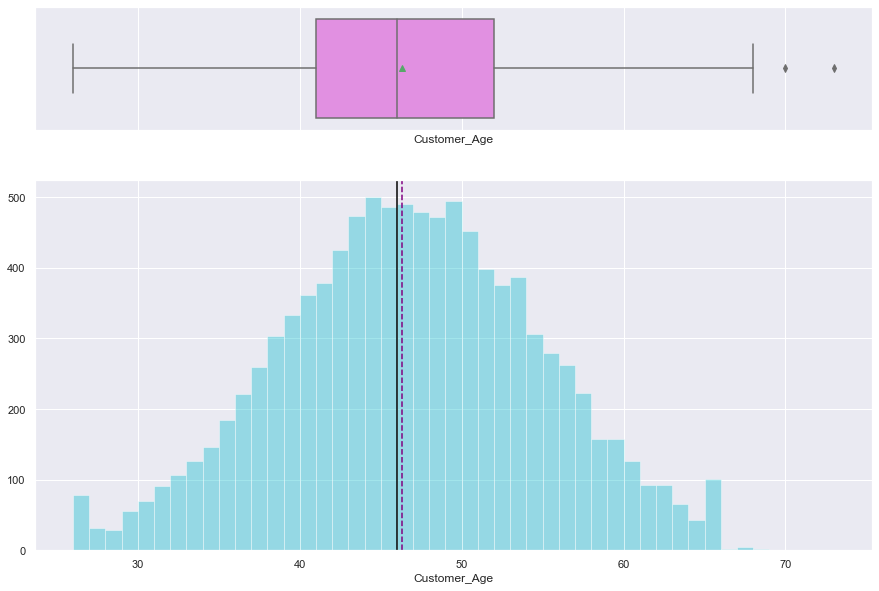

In [366]:
histogram_boxplot(data["Customer_Age"])

- As per the boxplot, there are no major outliers in 'Customer Age' variable
- Age has a fairly normal distribution distribution with approx equal mean and median

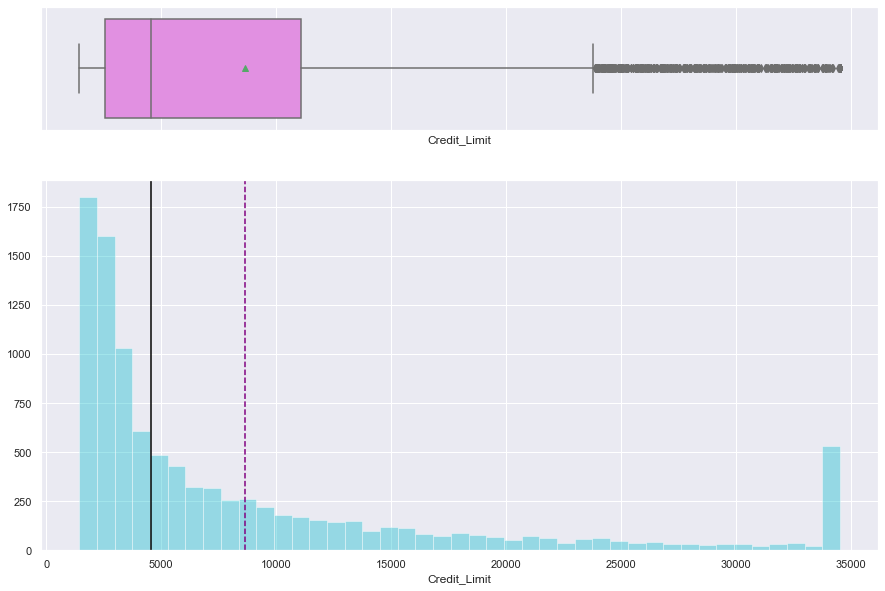

In [367]:
histogram_boxplot(data["Credit_Limit"])

- As per the boxplot, there are outliers in 'Credit Limit' variable
- In the real world scenario, we can see this so let us see how we will treat these outliers.

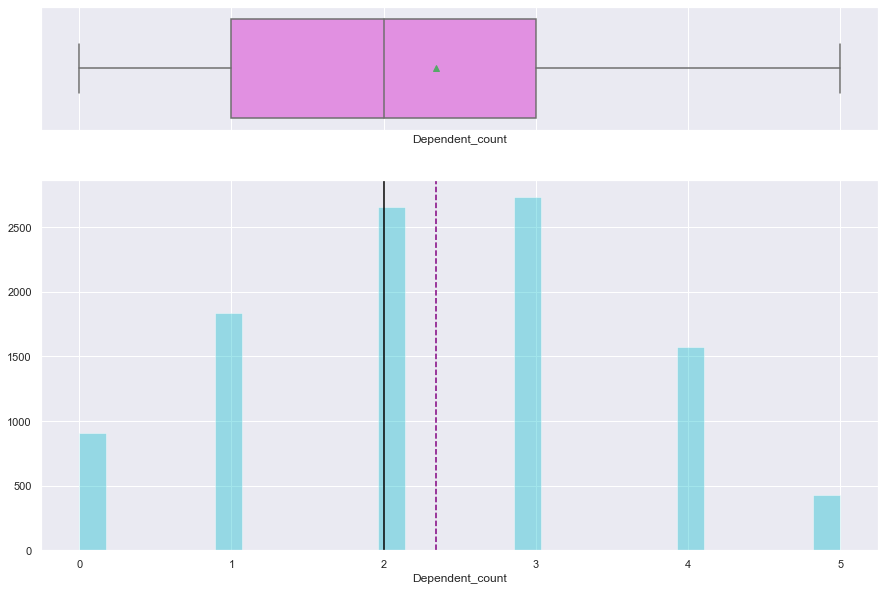

In [368]:
histogram_boxplot(data["Dependent_count"])

- There doesn't seem to be any outliers with dependent count.

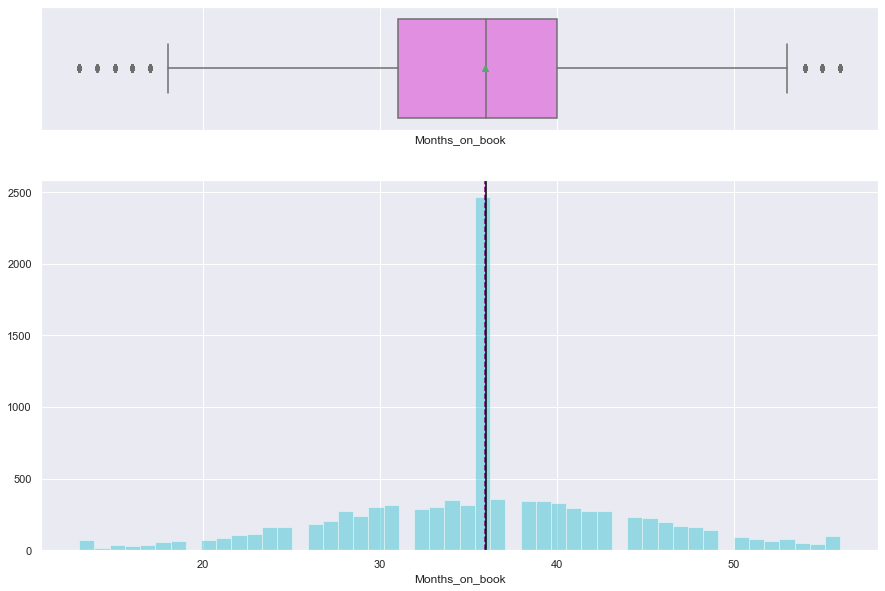

In [369]:
histogram_boxplot(data["Months_on_book"])

- Months_on_book has a fairly normal distribution distribution with one value (36) has got a large count compared to others. 

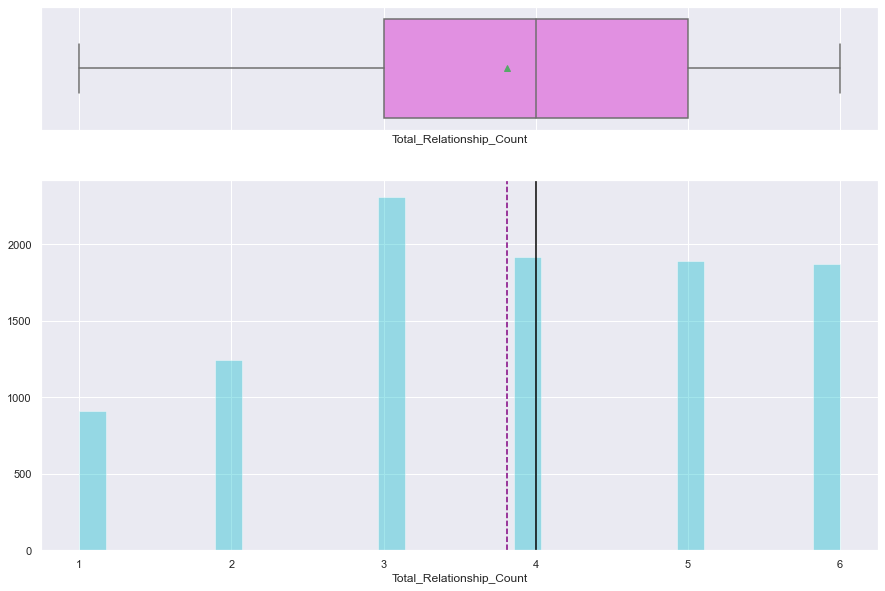

In [370]:
histogram_boxplot(data["Total_Relationship_Count"])

- Total_Relationship_Count has a fairly nice distribution distribution

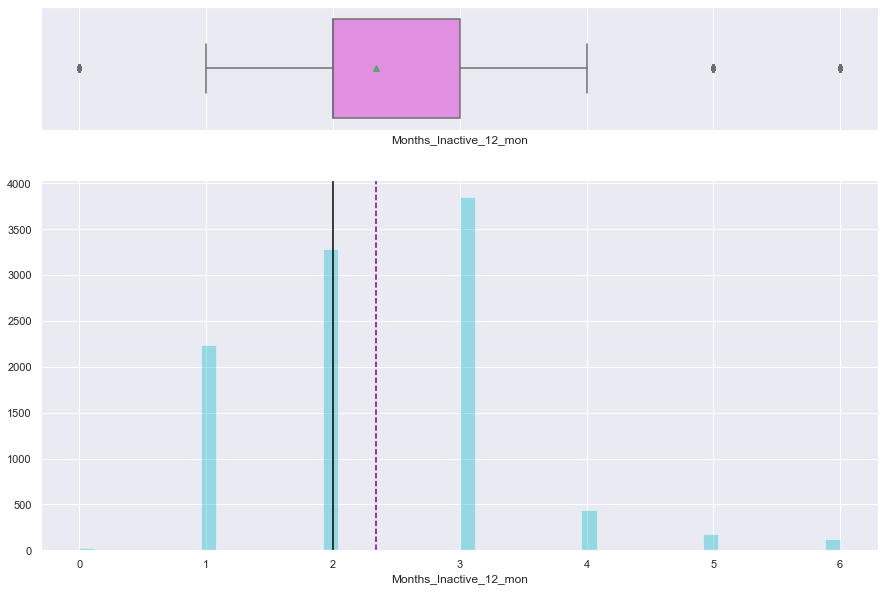

In [371]:
histogram_boxplot(data["Months_Inactive_12_mon"])

- Majority of customers are not activie between 1-3 months.

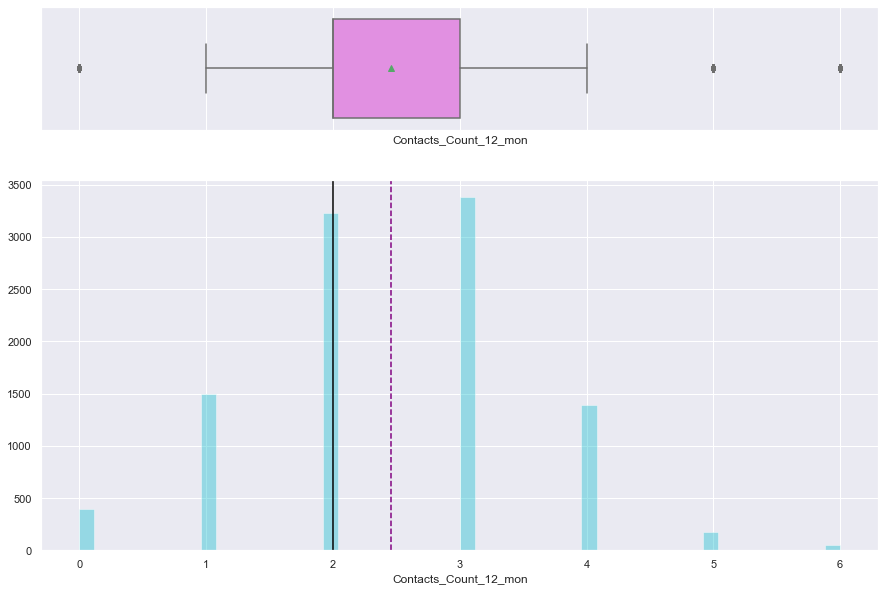

In [372]:
histogram_boxplot(data["Contacts_Count_12_mon"])

- There are some customers who have not contacted at all in the last 12 month and majority of the customers have reached out in the last 1-3 months.

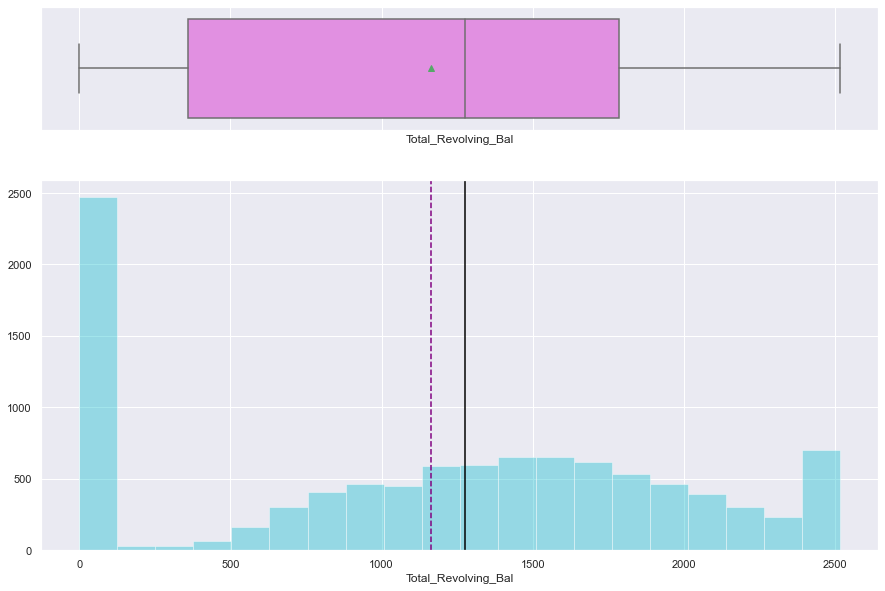

In [373]:
histogram_boxplot(data["Total_Revolving_Bal"])

- There are significant number of customers (25%) who are paying the credit card bills completely at the end of the biling cycle 

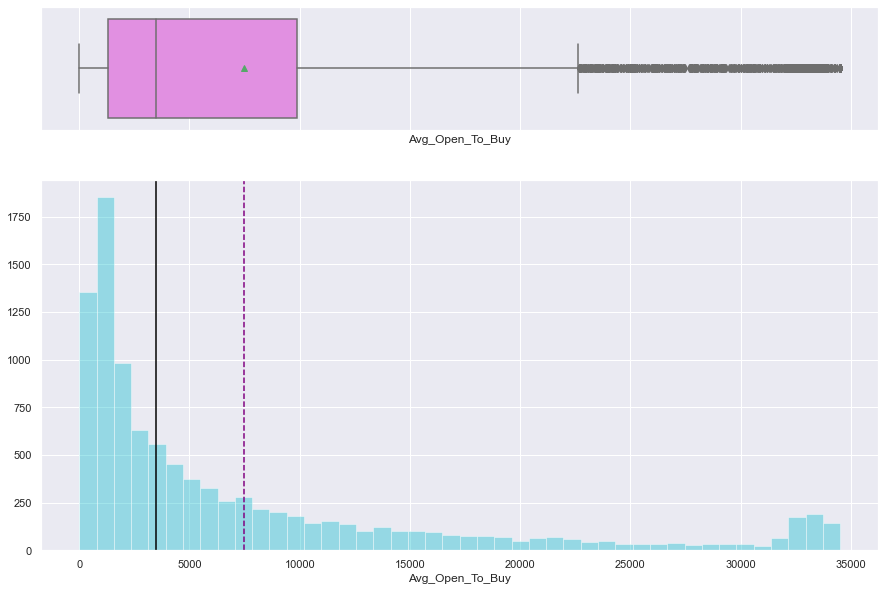

In [374]:
histogram_boxplot(data['Avg_Open_To_Buy'])

- We could see a similar distribution between Credit Limit and Avg_Open_To_Buy

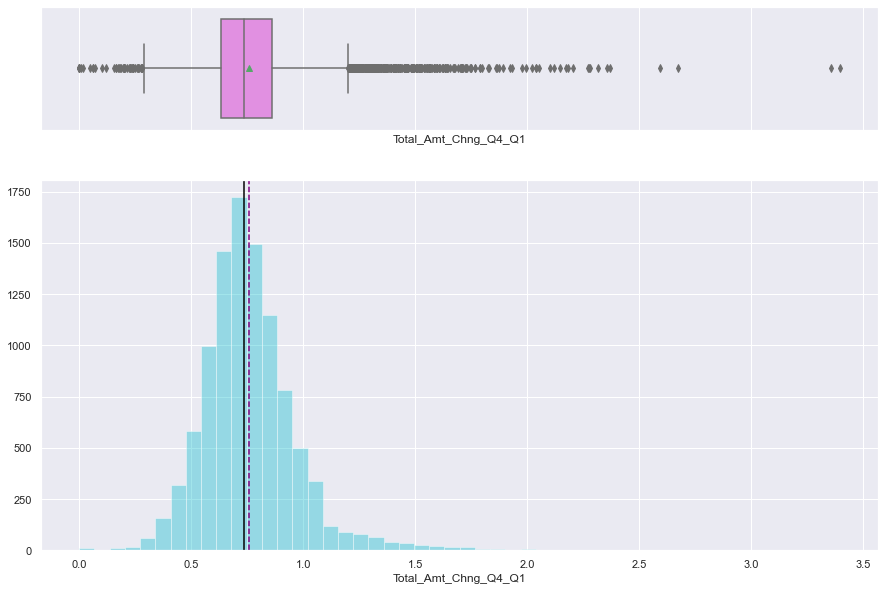

In [375]:
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

- Mean and Median are very close and fairly a nice distribution

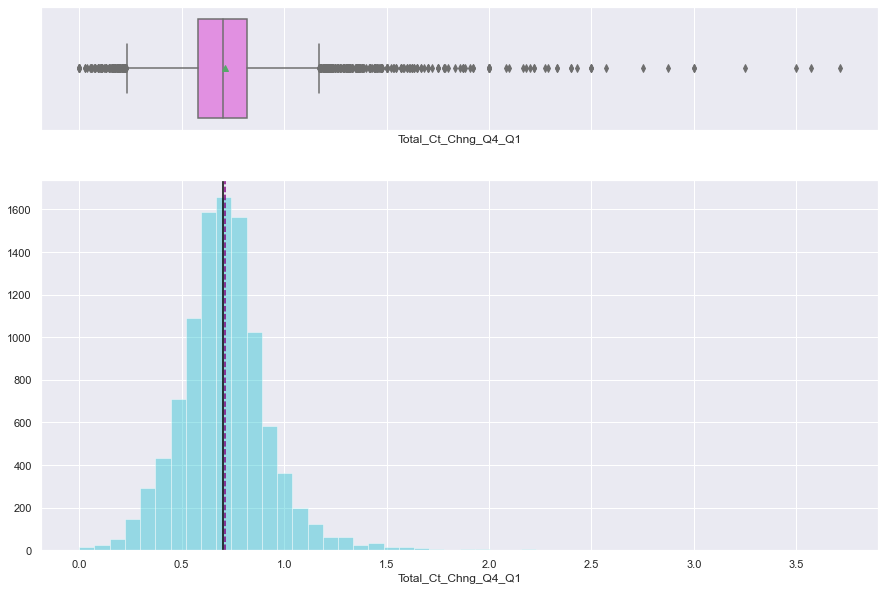

In [376]:
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

- A similar distribution pattern can be seen with Total_Amt_Chng_Q4_Q1

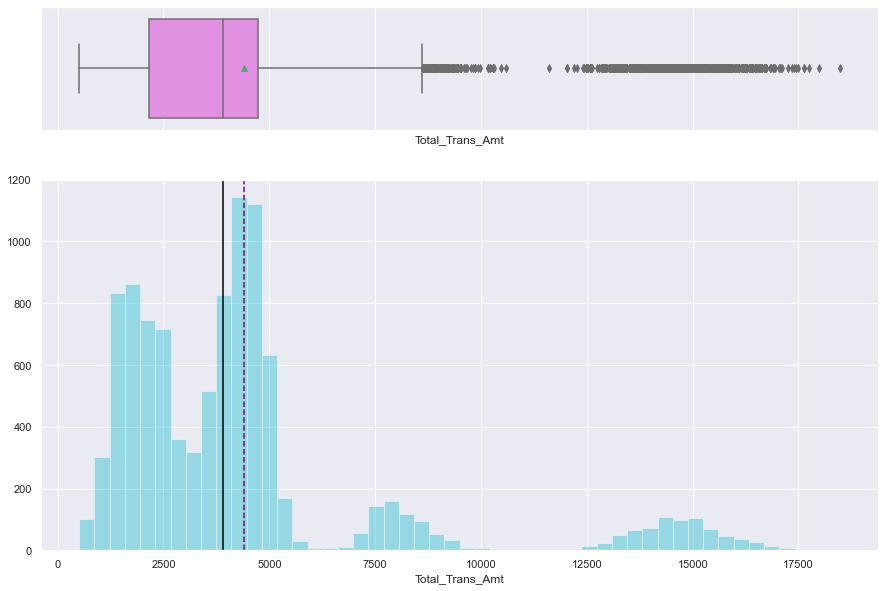

In [377]:
histogram_boxplot(data['Total_Trans_Amt'])

- There are quite a number of outliers and there is a lot of skewness in the distribution

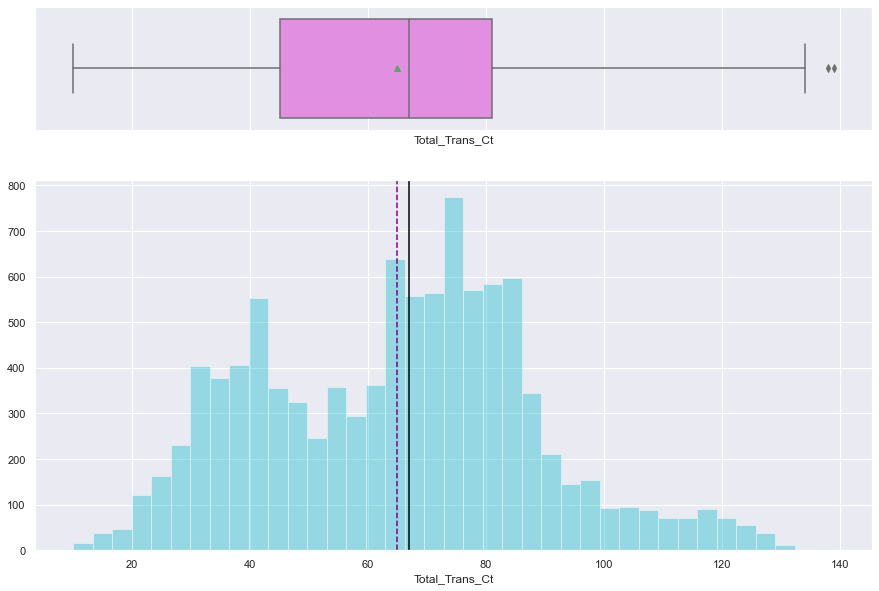

In [378]:
histogram_boxplot(data['Total_Trans_Ct'])

- Fairly distributed pattern we can see

In [379]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

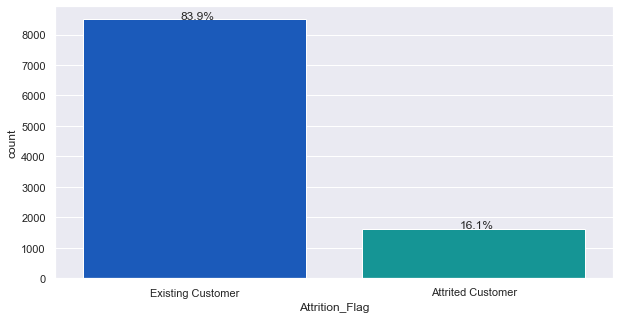

In [380]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Attrition_Flag"], palette="winter")
perc_on_bar(ax, data["Attrition_Flag"])

- We can see the target variable is very imbalanced

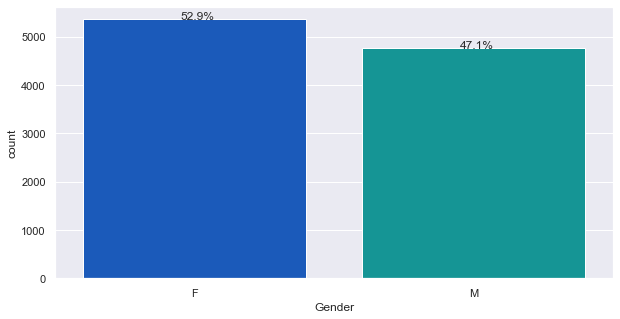

In [381]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Gender"], palette="winter")
perc_on_bar(ax, data["Gender"])    

- We can see the Male and Female are more or less equal

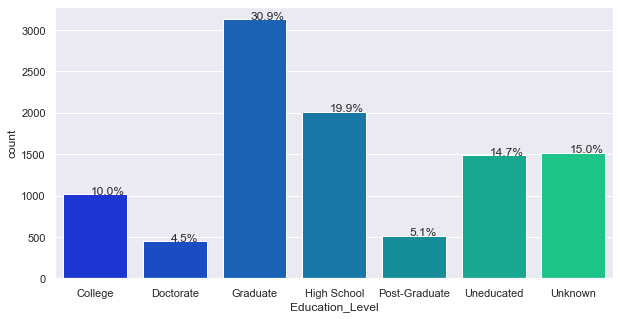

In [382]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Education_Level"], palette="winter")
perc_on_bar(ax, data["Education_Level"]) 

- We can see fairly a large number of customers are graduate / college educated.

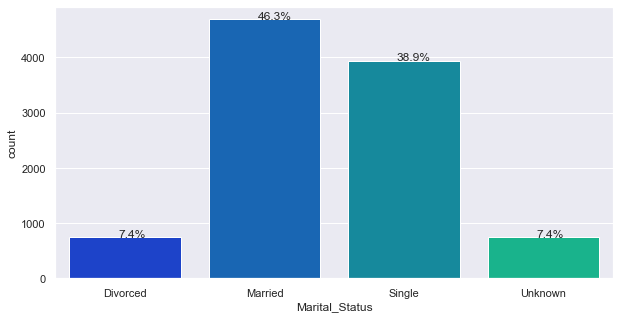

In [383]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Marital_Status"], palette="winter")
perc_on_bar(ax, data["Marital_Status"]) 

- Married and Single customers account for 85% of the customers

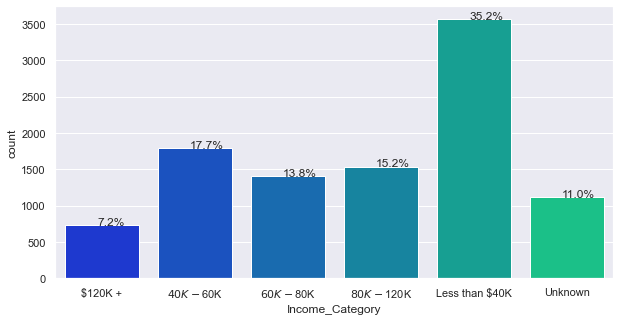

In [384]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Income_Category"], palette="winter")
perc_on_bar(ax, data["Income_Category"]) 

- 35% of the customers fall under Less than $40K 
- 30% of the customer fall between 40-80K range

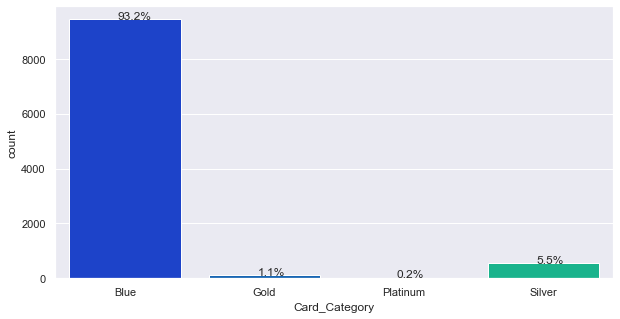

In [385]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Card_Category"], palette="winter")
perc_on_bar(ax, data["Card_Category"]) 

- Card Category Blue accounts for 93% of the customers

## Bivariate

In [386]:
#sns.pairplot(data, hue="Attrition_Flag")

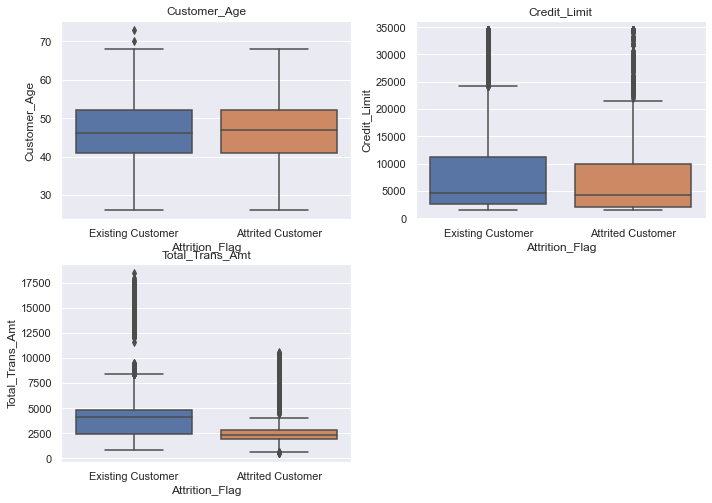

In [387]:
cols = data[["Customer_Age", "Credit_Limit", "Total_Trans_Amt"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customer Age, Credit Limit vs Attrition Flag doesn't seem to vary much
- Transaction Amount - We can see the average transaction amount of the attrited customer is less than who stay with the bank.

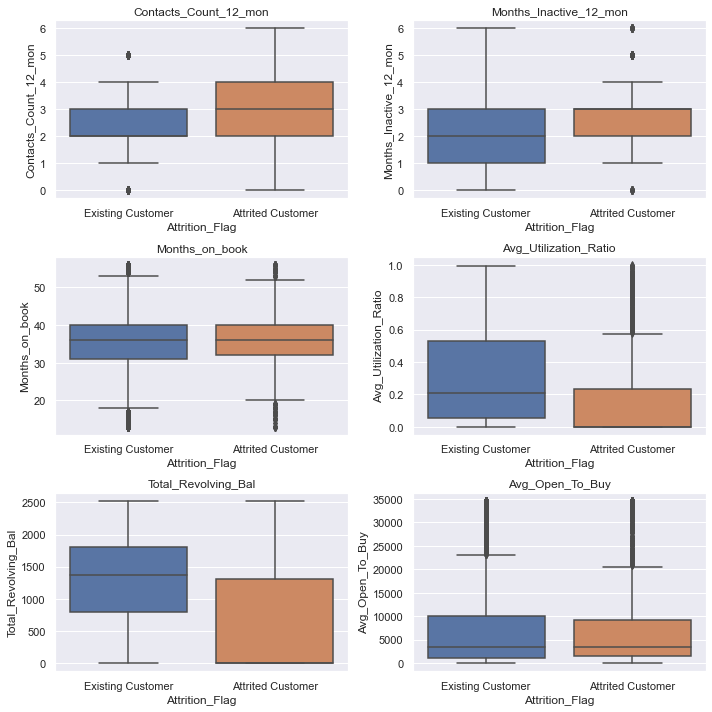

In [388]:
cols = data[["Contacts_Count_12_mon", "Months_Inactive_12_mon", "Months_on_book", "Avg_Utilization_Ratio","Total_Revolving_Bal","Avg_Open_To_Buy"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers who contact the bank more frequently are leaving compared to those who don't contact.

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Amt'>

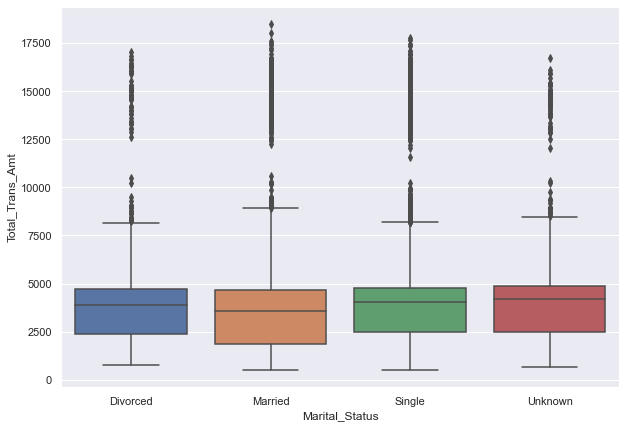

In [389]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Marital_Status", data=data, orient="vertical")

- Not a significant difference in the transaction amount with total transaction amount.

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

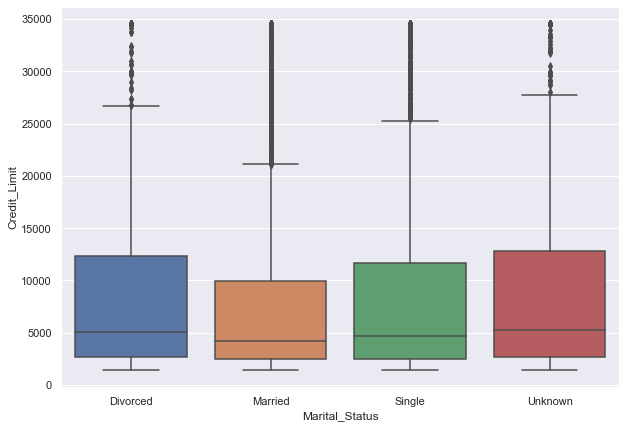

In [390]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Marital_Status", y="Credit_Limit", data=data, orient="vertical")

- Not a significant difference in the credit limit vs Marital Status

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

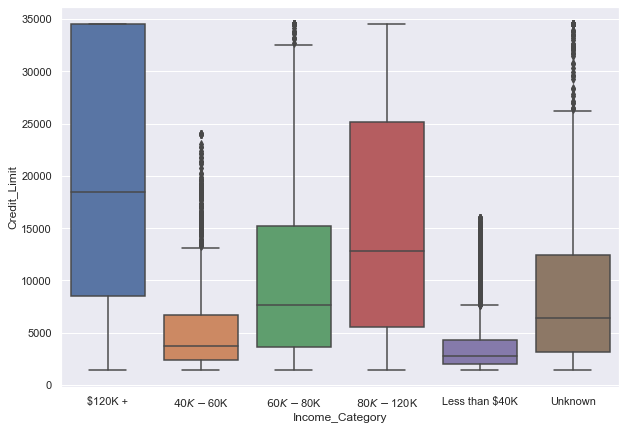

In [391]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Income_Category", y="Credit_Limit", data=data, orient="vertical")

- As expected people with higher income are having high credit limit.

<AxesSubplot:xlabel='Income_Category', ylabel='Total_Trans_Amt'>

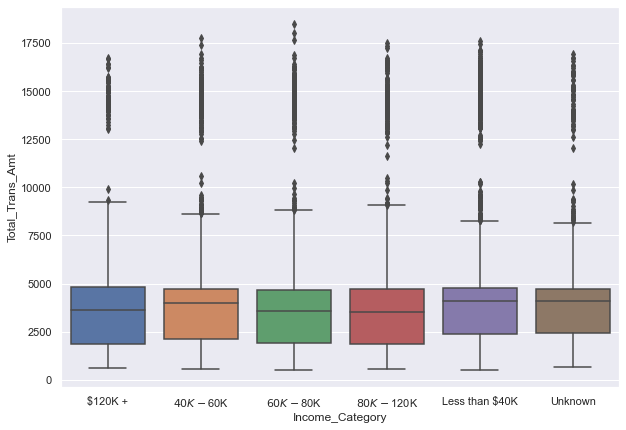

In [392]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Income_Category", y="Total_Trans_Amt", data=data, orient="vertical")

- Do not see a significant difference in the transaction amount vs income category.

In [393]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


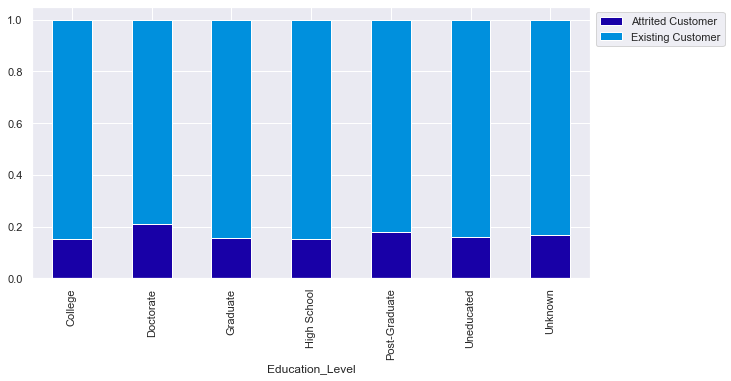

In [394]:
stacked_plot(data["Education_Level"])

- Comparatively higher % of customer with doctorate degree seems to be leaving compared to other levels.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


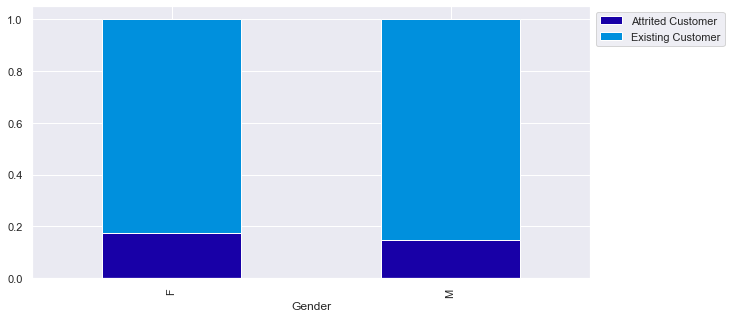

In [395]:
stacked_plot(data["Gender"])

- Not much significant difference between Male and Female

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


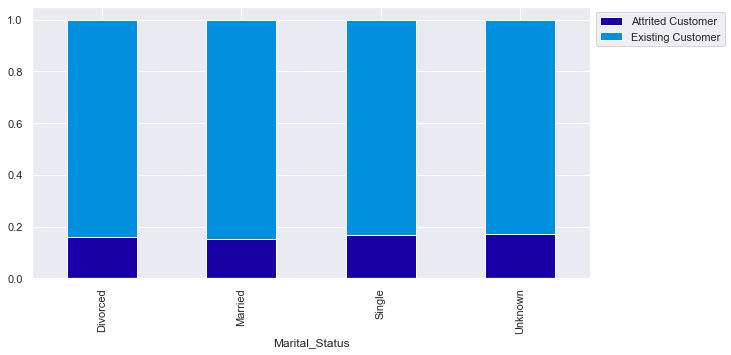

In [396]:
stacked_plot(data["Marital_Status"])

- Not much difference in attrition vs Marital Status

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


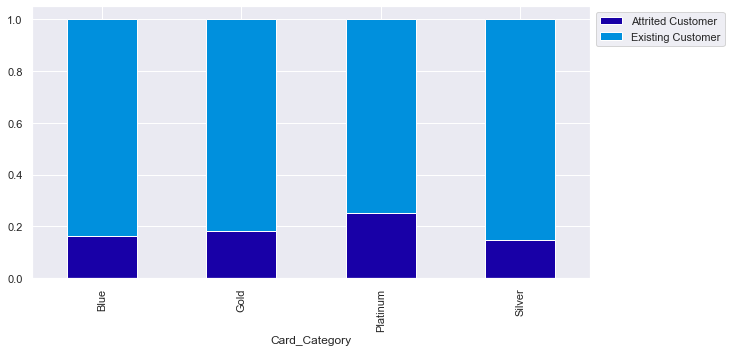

In [397]:
stacked_plot(data["Card_Category"])

- Platinum customers seems to be leaving slightly more than the other level of customers, though we know significant number of customers are having blue card.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


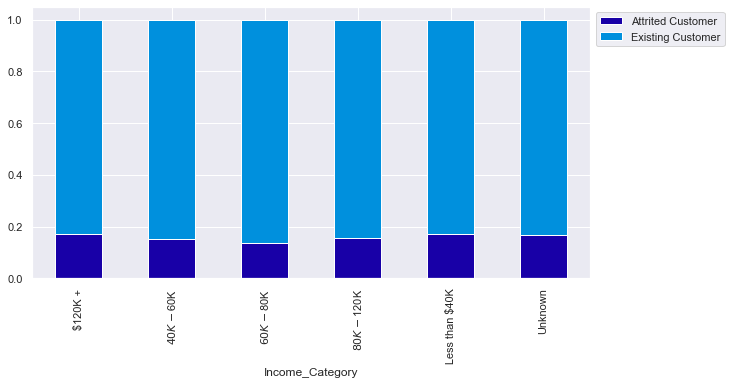

In [398]:
stacked_plot(data["Income_Category"])

- Across all income category, we see a similar pattern

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Open_To_Buy'>

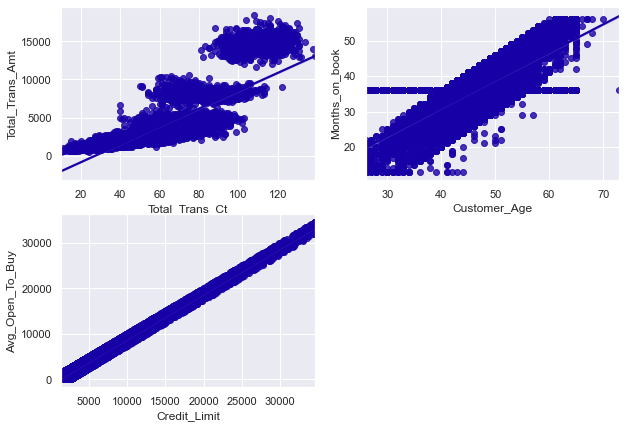

In [399]:
plt.subplot(2,2,1)
sns.regplot(x=data['Total_Trans_Ct'], y=data['Total_Trans_Amt'])
plt.subplot(2,2,2)
sns.regplot(x=data.Customer_Age, y=data.Months_on_book)
plt.subplot(2,2,3)
sns.regplot(y=data.Avg_Open_To_Buy, x=data.Credit_Limit)

- We can see high corelation between the following variables. Let us analyze the heat map and decide
- Credit_Limit and Avg_Open_To_Buy 
- Customer_Age and Months_on_book
- Total_Trans_Amt and Total_Trans_Ct. 

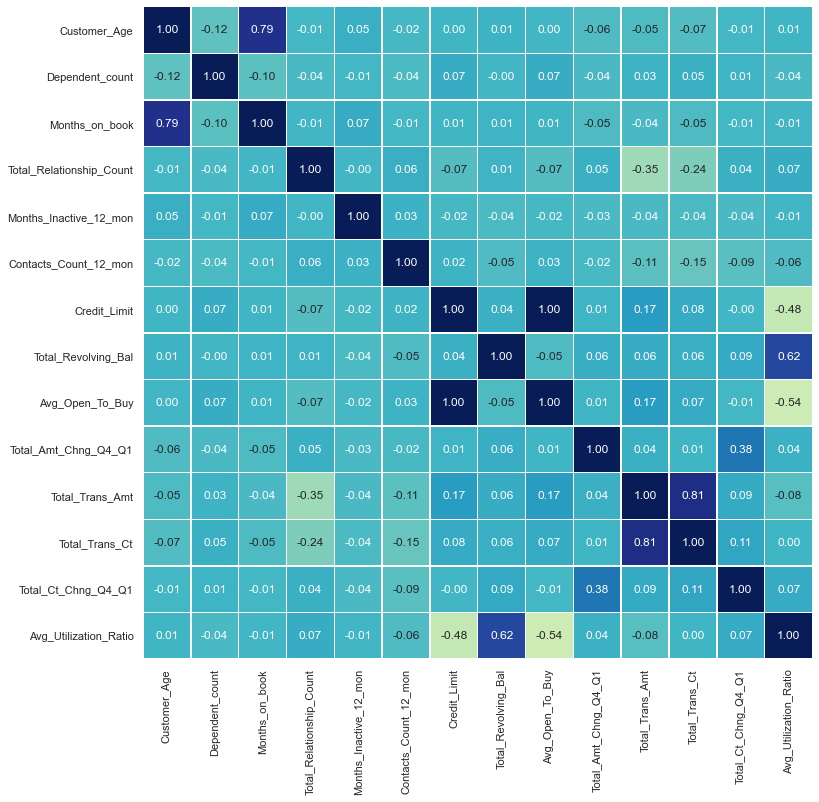

In [400]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

- As expected, Avg_Open_To_Buy and Credit_Limit birth have high positive correlation. We can drop one of them.
- Total_Trans_Ct and Total_Trans_Amt also has a high corelation.So is the case with Month_on_book and Customer_Age
- Total_Revolving_Balance and Avg_Utilization also has got a decent positive corelation.

# Data Preparation

In [258]:
data['Education_Level'].value_counts()
data['Marital_Status'].value_counts()
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

- We can see there are unknown values in Education_Level, Marital_Status and Income_Category

In [259]:
data['Education_Level'].replace('Unknown',np.NaN,inplace=True)
data['Marital_Status'].replace('Unknown',np.NaN,inplace=True)
data['Income_Category'].replace('Unknown',np.NaN,inplace=True)

- We will replace these Unknown with Null Values

In [260]:
data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [261]:
gender = {'M':1, 'F':2}
data['Gender']=data['Gender'].map(gender)
education_level = {'Graduate':1,'High School':2, 'Uneducated':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
data['Education_Level']=data['Education_Level'].map(education_level)
marital_status = {'Married':1,'Single':2, 'Divorced':3}
data['Marital_Status']=data['Marital_Status'].map(marital_status)
income_category = {'Less than $40K':1,'$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4,'$120K +':5}
data['Income_Category']=data['Income_Category'].map(income_category)
card_category = {'Blue':1,'Silver':2, 'Gold':3, 'Platinum':4}
data['Card_Category']=data['Card_Category'].map(card_category)

In [262]:
#data.drop(['Avg_Open_To_Buy','Total_Trans_Ct','Months_on_book'],axis=1,inplace=True)
data.drop(['Avg_Open_To_Buy','Months_on_book'],axis=1,inplace=True)
#data.drop('Avg_Open_To_Buy',axis=1,inplace=True)

- Dropping the below two columns from the corelation matrix.

In [263]:
data['Attrition_Flag'].replace('Attrited Customer',1,inplace=True) 
data['Attrition_Flag'].replace('Existing Customer',0,inplace=True)

In [264]:
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

**Split the data into train and test sets** 

In [265]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 17) (3039, 17)


### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [266]:
imputer = KNNImputer(n_neighbors=5)

In [267]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [268]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct            

- All missing values have been treated.
- Let's inverse map the encoded values.

In [269]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [270]:
inverse_mapping(gender,'Gender')
inverse_mapping(education_level,'Education_Level')
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(income_category,'Income_Category')
inverse_mapping(card_category,'Card_Category')

* Checking inverse mapped values/categories.

In [271]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2253
High School      1947
Uneducated       1436
College           772
Post-Graduate     368
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3498
Single      3088
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2618
$40K - $60K       1509
$80K - $120K      1362
$60K - $80K       1089
$120K +            510
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [272]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2253
High School      1947
Uneducated       1436
College           772
Post-Graduate     368
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3498
Single      3088
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2618
$40K - $60K       1509
$80K - $120K      1362
$60K - $80K       1089
$120K +            510
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


* Inverse mapping returned original labels.


## Building the model
### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer is expected to leave but in reality the customer is not leaving
2. Predicting a customer is not expexted to leave but the customer is actually leaving.

#### Which case is more important? 
* Predicting a customer is not expected to leave but the customer is leaving i.e. losing on a potential customer

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

### Encoding categorical varaibles

In [274]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 27) (3039, 27)


* After encoding there are 27 columns.

In [275]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [276]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model Building - Logistic Regression (up, down and regularizing)

In [277]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

Accuracy on training set :  0.889813769751693
Accuracy on test set :  0.8910825929582099
Recall on training set :  0.4942932396839333
Recall on test set :  0.48770491803278687
Precision on training set :  0.7330729166666666
Precision on test set :  0.7460815047021944


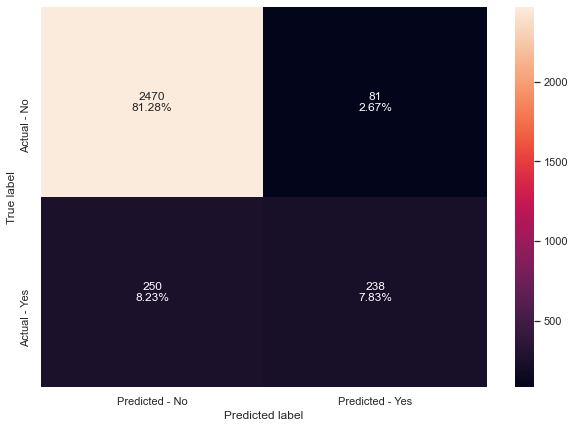

In [278]:
get_metrics_score(lr,X_train,X_test,y_train,y_test)
make_confusion_matrix(lr,y_test)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

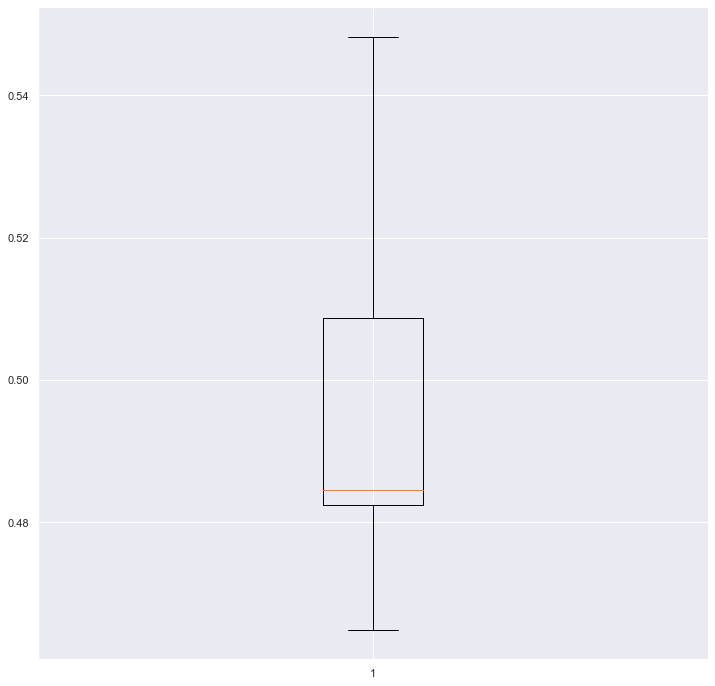

In [279]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training set varies between 0.47 to 0.54

Accuracy on training set :  0.889813769751693
Accuracy on test set :  0.8910825929582099
Recall on training set :  0.4942932396839333
Recall on test set :  0.48770491803278687
Precision on training set :  0.7330729166666666
Precision on test set :  0.7460815047021944


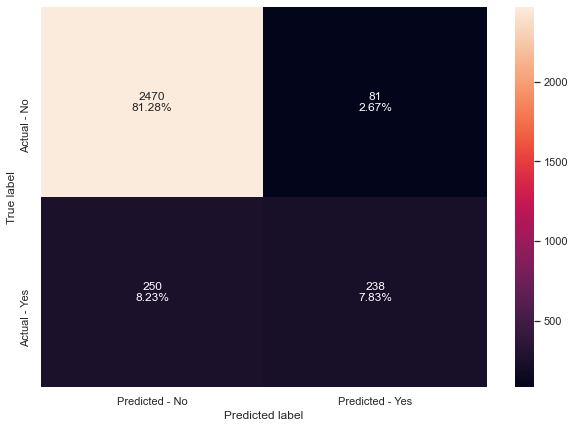

In [280]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [281]:
from imblearn.over_sampling import SMOTE

In [282]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 27)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [283]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

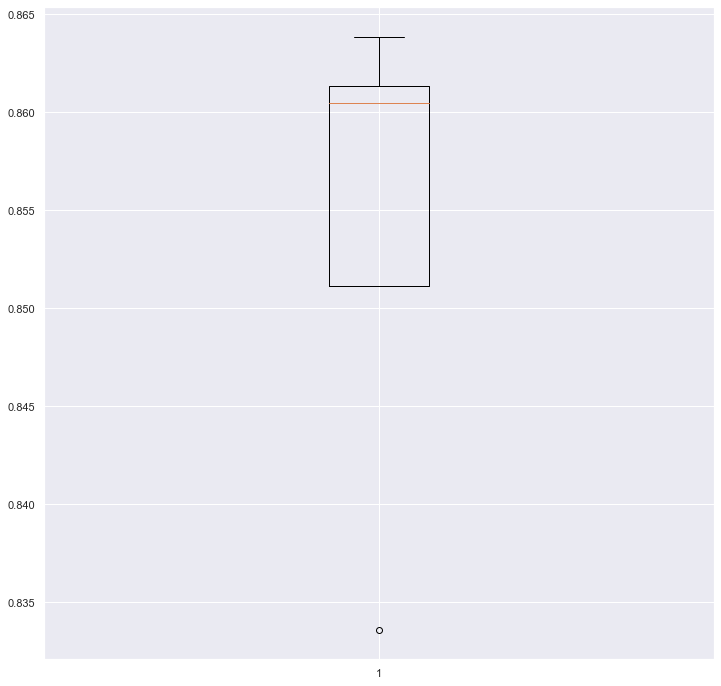

In [284]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.83 to 0.86, which is an improvement from the previous model
* Let's check the performance on the test set.

Accuracy on training set :  0.8594721801983527
Accuracy on test set :  0.8219809147745969
Recall on training set :  0.872247436543957
Recall on test set :  0.7704918032786885
Precision on training set :  0.8505163088018358
Precision on test set :  0.4670807453416149


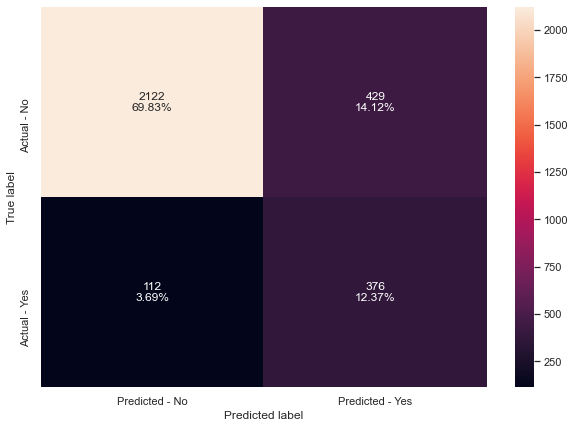

In [285]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

- Performance on the training and test set has improved.
- Let us look at regularization and undersampling

### Regularization

In [286]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7119683980500925
Accuracy on test set :  0.786442908851596
Recall on training set :  0.5846360732896285
Recall on test set :  0.5368852459016393
Precision on training set :  0.7843933243121335
Precision on test set :  0.38248175182481753


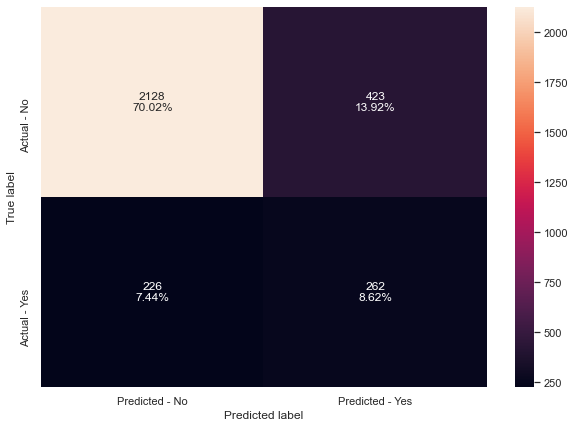

In [287]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

- With regularization we could see that the performance has come down compared to over sampling.

### Undersampling train data using SMOTE

In [288]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [289]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 27)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [290]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

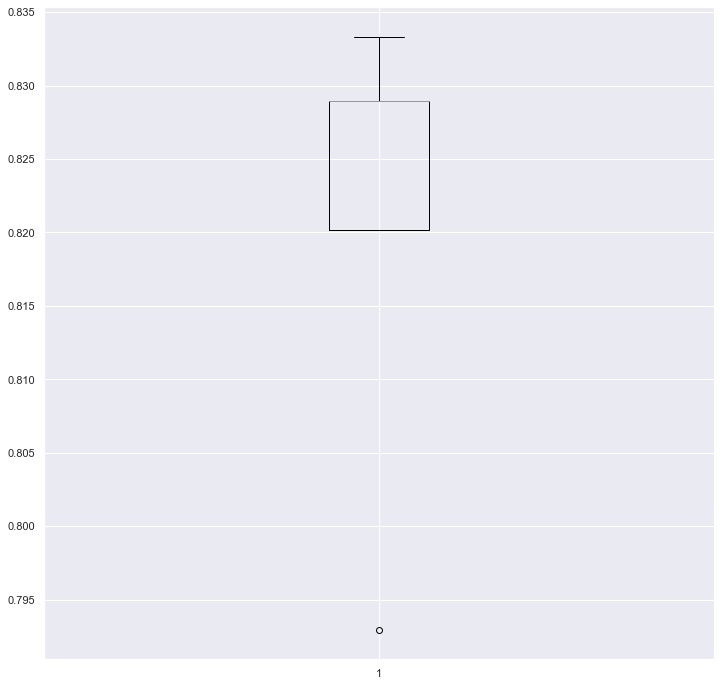

In [291]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

- Performance is around 0.79 to 83 with undersampling

Accuracy on training set :  0.8156277436347673
Accuracy on test set :  0.8259295820993748
Recall on training set :  0.8129938542581212
Recall on test set :  0.8135245901639344
Precision on training set :  0.8172992056487202
Precision on test set :  0.4754491017964072


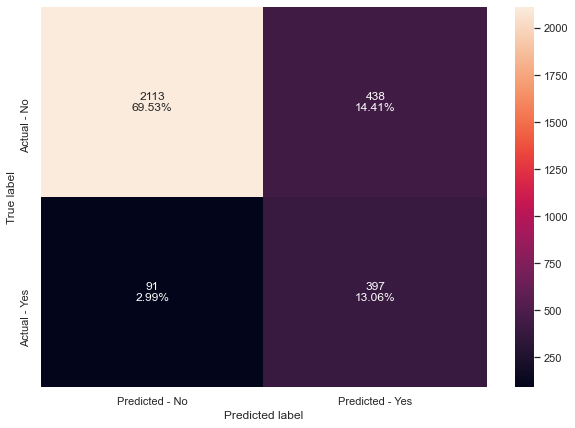

In [292]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

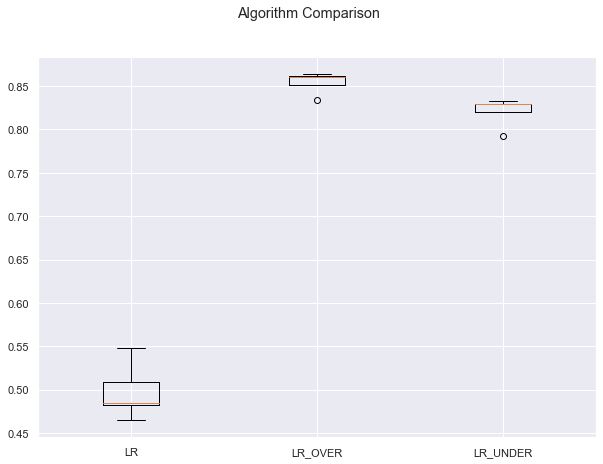

In [293]:
# Plotting boxplots for CV scores of all models defined above
names = ['LR','LR_OVER','LR_UNDER']
results = [cv_result_bfr,cv_result_over,cv_result_under]
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- * Model has given a generalized performance on training and test set.
* Model performance has improved using over and under sampling - Logistic regression is now able to differentiate well between positive and negative classes.

In [294]:
# defining list of model
models = [lr]
#models = [lr,log_reg_over,lr_estimator,log_reg_under]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [295]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [296]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [297]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)',
                                          'Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.889814,0.891083,0.494293,0.487705,0.733073,0.746082
1,Logistic Regression on Oversampled data,0.859472,0.821981,0.872247,0.770492,0.850516,0.467081
2,Logistic Regression-Regularized (Oversampled d...,0.711968,0.786443,0.584636,0.536885,0.784393,0.382482
3,Logistic Regression on Undersampled data,0.815628,0.825930,0.812994,0.813525,0.817299,0.475449


* Logistic regression model on undersampled data has given a generalized performance with the highest recall on test data.

## Model building - Bagging and Boosting (Decision Tree, Random Forest, AdaBoost, Gradient Boost, XGBoost)

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validator` provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [298]:
models = []  # Empty list to store all the models

# # Appending pipelines for each model into the list
# models.append(
#     (
#         "LR",
#         Pipeline(
#             steps=[
#                 ("scaler", StandardScaler()),
#                 ("log_reg", LogisticRegression(random_state=1)),
#             ]
#         ),
#     )
# )
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

RF: 78.57639693948528
GBM: 83.22938403276915
ADB: 83.75801839400262
[22:28:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in 

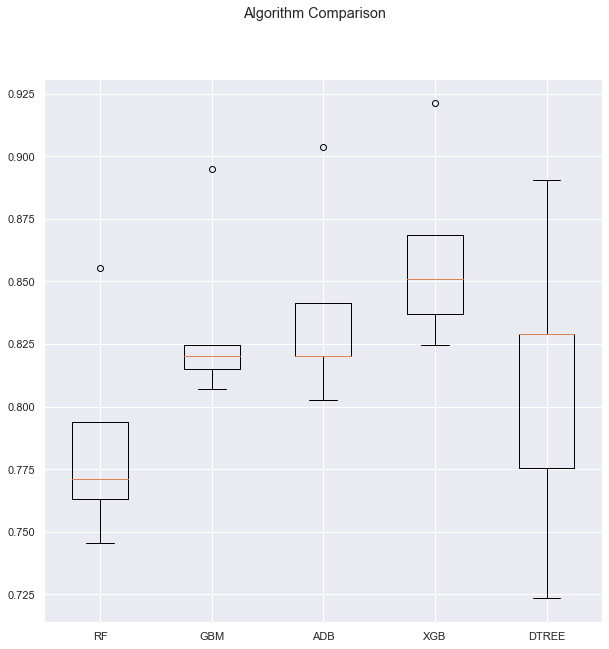

In [299]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10,10))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost , AdaBoost and Gradient Boost are giving the highest cross validated recall.
- The boxplot shows that the performance of both the models is consistent with just one outlier for AdaBoost.
- We will tune GradientBoost, AdaBoost and XGBoost and see if the performance improves. 

# Hyperparameter Tuning
**We will use pipelines with StandardScaler and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

In [300]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [301]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## GradienBoost - GridSearchCV

In [314]:
%%time
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1)
)

# Parameter grid to pass in GridSearchCV
param_grid = {
              'gradientboostingclassifier__learning_rate': [0.01,0.05,0.1,1,0.5], #so called `eta` value
              'gradientboostingclassifier__max_depth': [3,4,5],
              'gradientboostingclassifier__min_samples_leaf': [4,5,6],
              'gradientboostingclassifier__subsample': [0.6,0.7,0.8],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'gradientboostingclassifier__learning_rate': 0.5, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__min_samples_leaf': 5, 'gradientboostingclassifier__subsample': 0.7} with CV score=0.8779890254270036:
CPU times: user 16min 39s, sys: 8.38 s, total: 16min 47s
Wall time: 17min 41s


In [315]:
# Creating new pipeline with best parameters
gb_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,
        max_depth=3,
        min_samples_leaf=5,
        subsample=0.7,
        learning_rate=0.5,
    ),
)

# Fit the model on training data
gb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.5,
                                            min_samples_leaf=5, random_state=1,
                                            subsample=0.7))])

Accuracy on training set :  0.996755079006772
Accuracy on test set :  0.9700559394537677
Recall on training set :  0.9850746268656716
Recall on test set :  0.9118852459016393
Precision on training set :  0.9946808510638298
Precision on test set :  0.9026369168356998


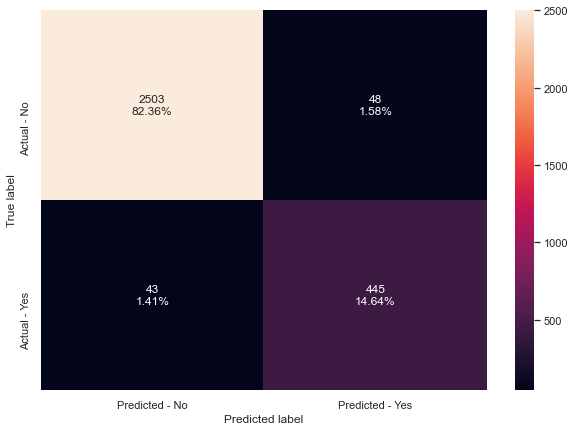

In [316]:
# Calculating different metrics
get_metrics_score(gb_tuned1)

# Creating confusion matrix
make_confusion_matrix(gb_tuned1, y_test)

- The test recall has increased by ~8% as compare to cross validated recall
- The tuned Gradient Boost tree model is performing really well
- The test recall is around 90%

## GradientBoost - RandomSearchCV

In [317]:
%%time
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1)
)

# Parameter grid to pass in GridSearchCV
param_grid = {
              'gradientboostingclassifier__learning_rate': [0.01,0.05,0.1,1,0.5], #so called `eta` value
              'gradientboostingclassifier__max_depth': [3,4,5],
              'gradientboostingclassifier__min_samples_leaf': [4,5,6],
              'gradientboostingclassifier__subsample': [0.6,0.7,0.8],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__min_samples_leaf': 4, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__learning_rate': 0.5} with CV score=0.8727104103872015:
CPU times: user 5min 45s, sys: 2.29 s, total: 5min 47s
Wall time: 5min 57s


In [318]:
# Creating new pipeline with best parameters
gb_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,
        max_depth=4,
        min_samples_leaf=4,
        subsample=0.8,
        learning_rate=0.5,
    ),
)
# Fit the model on training data
gb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.5, max_depth=4,
                                            min_samples_leaf=4, random_state=1,
                                            subsample=0.8))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9723593287265548
Recall on training set :  1.0
Recall on test set :  0.9159836065573771
Precision on training set :  1.0
Precision on test set :  0.9122448979591836


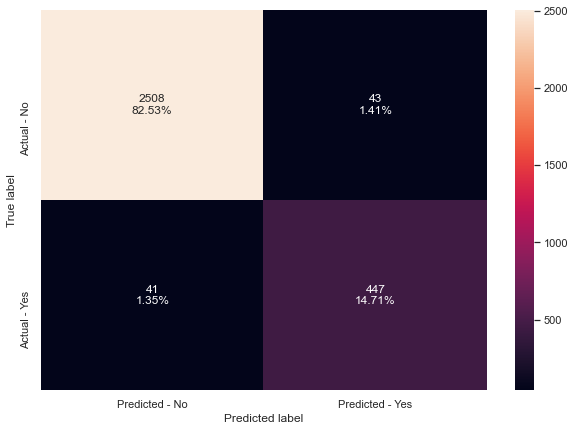

In [319]:
# Calculating different metrics
get_metrics_score(gb_tuned2)

# Creating confusion matrix
make_confusion_matrix(gb_tuned2, y_test)

- We can see the model is overfitting the training data and we can definitely see the RandomSearchCV (around 6 min) has taken less time to complete compared to GridSearchCV (around 17 min).
- It has got almost the same recall as that of GridSearchCV

## AdaBoost - GridSearchCV

In [337]:
%%time
#Creating pipeline
pipe=make_pipeline(StandardScaler(),AdaBoostClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid = {
    #Let's try different max_depth for base_estimator
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "adaboostclassifier__n_estimators": np.arange(10,110,10),
    "adaboostclassifier__learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2), 'adaboostclassifier__learning_rate': 0.5, 'adaboostclassifier__n_estimators': 100} with CV score=0.8858760336965762:
CPU times: user 36min 41s, sys: 35 s, total: 37min 16s
Wall time: 42min 28s


In [338]:
# Creating new pipeline with best parameters
adb_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        random_state=1,
        base_estimator=DecisionTreeClassifier(max_depth=2),
        n_estimators=100,
        learning_rate=0.5,
    ),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.5, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9870203160270881
Accuracy on test set :  0.9753208292201382
Recall on training set :  0.9482001755926251
Recall on test set :  0.9200819672131147
Precision on training set :  0.9703504043126685
Precision on test set :  0.9257731958762887


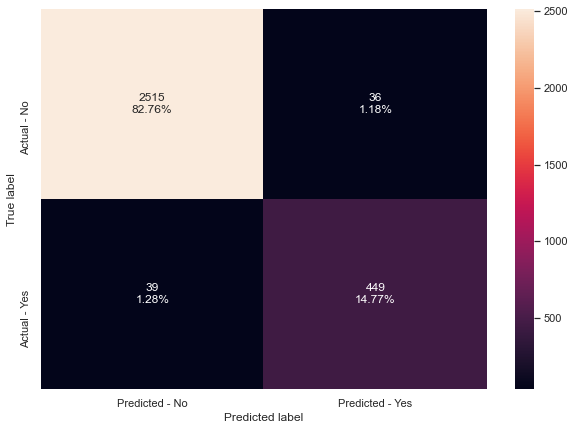

In [339]:
# Calculating different metrics
get_metrics_score(adb_tuned1)

# Creating confusion matrix
make_confusion_matrix(adb_tuned1, y_test)

- The test recall has increased by ~8% as compare to cross validated recall.
- The tuned AdaBoost  model is performing really well
- The test recall is around 92%

## AdaBoost - RandomSearchCV

In [340]:
%%time
#Creating pipeline
pipe=make_pipeline(StandardScaler(),AdaBoostClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid = {
    #Let's try different max_depth for base_estimator
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "adaboostclassifier__n_estimators": np.arange(10,110,10),
    "adaboostclassifier__learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 80, 'adaboostclassifier__learning_rate': 0.5, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2)} with CV score=0.8762230466032925:
CPU times: user 3min 11s, sys: 3.21 s, total: 3min 14s
Wall time: 3min 26s


In [341]:
# Creating new pipeline with best parameters
adb_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        random_state=1,
        base_estimator=DecisionTreeClassifier(max_depth=2),
        n_estimators=80,
        learning_rate=0.5,
    ),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.5, n_estimators=80,
                                    random_state=1))])

Accuracy on training set :  0.9834932279909706
Accuracy on test set :  0.9743336623889437
Recall on training set :  0.9367866549604916
Recall on test set :  0.9118852459016393
Precision on training set :  0.9595323741007195
Precision on test set :  0.9270833333333334


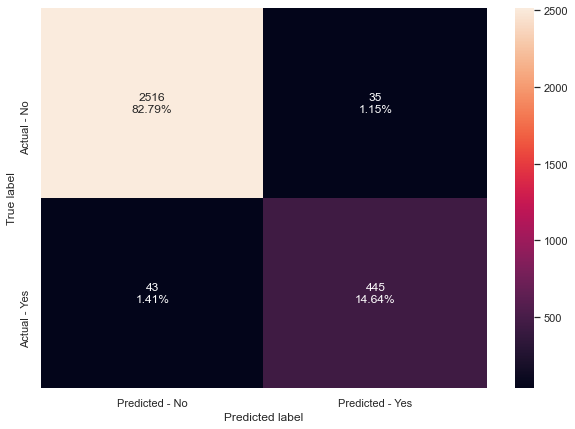

In [342]:
# Calculating different metrics
get_metrics_score(adb_tuned2)

# Creating confusion matrix
make_confusion_matrix(adb_tuned2, y_test)

- The test recall is similar to Adaboost Grid Search and it is performing well. We can see the AdaBoost GridSearch execution time (36 min) is more than AdaBoost RandomSearchCV (3 min)
- The tuned AdaBoost  model is performing really well
- The test recall is around 92%

## XGBoost - GridSearchCV

In [343]:
%%time
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9499574928510703:
CPU times: user 9h 33min 24s, sys: 11min 18s, total: 9h 44min 43s
Wall time: 3h 9min 11s


In [344]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=150,
        scale_pos_weight=10,
        subsample=0.8,
        learning_rate=0.01,
        gamma=5,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

[11:04:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9387697516930023
Accuracy on test set :  0.9167489305692662
Recall on training set :  0.9947322212467077
Recall on test set :  0.9549180327868853
Precision on training set :  0.7258167841127482
Precision on test set :  0.6685796269727403


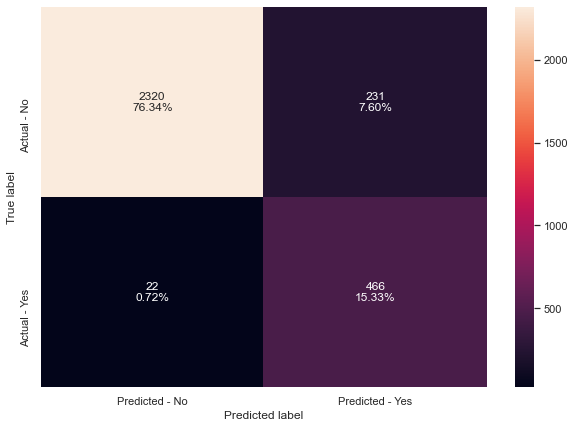

In [345]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased by ~8% as compare to cross validated recall. But it looks like there is close to overfitting.

## XGBoost-RandomSearchCV

In [346]:
%%time
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

[11:05:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:05:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:06:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:06:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:07:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:07:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:07:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:07:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:07:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:07:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:07:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:07:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:08:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:08:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:09:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[11:09:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:09:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [347]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                learning_rate=0.05,
                gamma=5,
                subsample=1,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

[11:09:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9500564334085779
Accuracy on test set :  0.9282658769332017
Recall on training set :  0.9973661106233538
Recall on test set :  0.9610655737704918
Precision on training set :  0.7639542703429725
Precision on test set :  0.7020958083832335


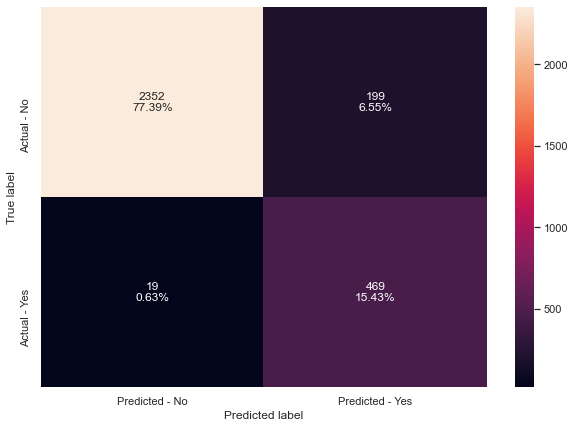

In [348]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- The XGBoost model recall is really good compare to cross validated recall. We see the execution time of XGBoostGrid SearchCV (3 hours) is very high compared to XGBoost RandomSearchCV(4 mins)
- The tuned XGBoost  model is performing really well in terms of recall, but the precision is not that great.

In [349]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, gb_tuned1, gb_tuned2, adb_tuned1, adb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [350]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost tuned with GridSearchCV",
            "XGBoost tuned with RandomizedSearchCV",
            "Gradient Boost tuned with GridSearchCV",
            "Gradient Boost tuned with RandomizedSearchCV",
            "AdaBoost tuned with GridSearchCV",
            "AdaBoost tuned with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
1,XGBoost tuned with RandomizedSearchCV,0.950056,0.928266,0.997366,0.961066,0.763954,0.702096
0,XGBoost tuned with GridSearchCV,0.938770,0.916749,0.994732,0.954918,0.725817,0.668580
4,AdaBoost tuned with GridSearchCV,0.987020,0.975321,0.948200,0.920082,0.970350,0.925773
3,Gradient Boost tuned with RandomizedSearchCV,1.000000,0.972359,1.000000,0.915984,1.000000,0.912245
2,Gradient Boost tuned with GridSearchCV,0.996755,0.970056,0.985075,0.911885,0.994681,0.902637
5,AdaBoost tuned with RandomizedSearchCV,0.983493,0.974334,0.936787,0.911885,0.959532,0.927083


- We can see the test recall is significantly higher in hyperparameter tuning modesl.

In [411]:
def draw_feature_importances(model):
    feature_names = X_train.columns
    importances = model[1].feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

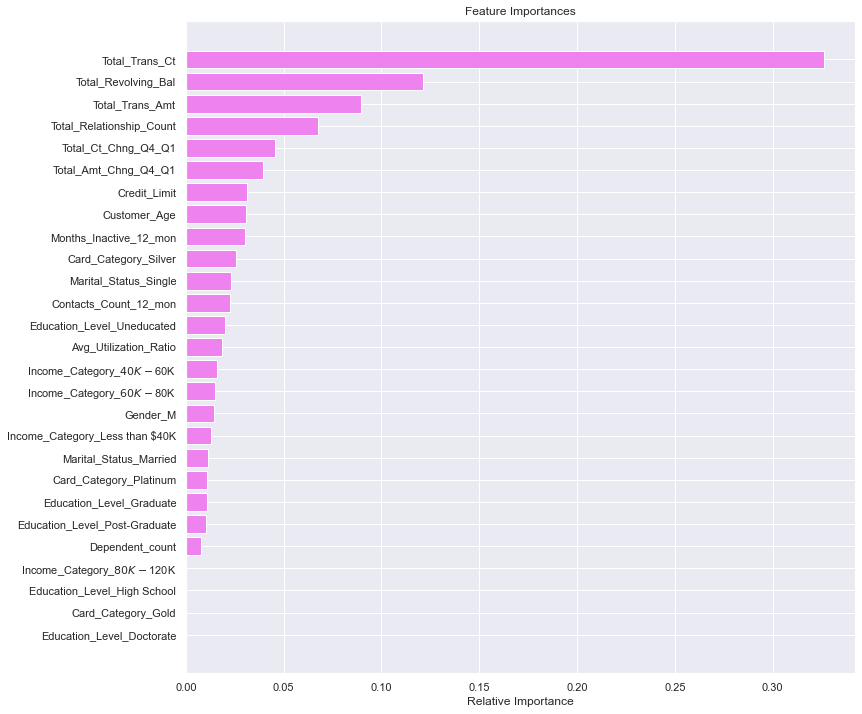

In [412]:
draw_feature_importances(xgb_tuned2)

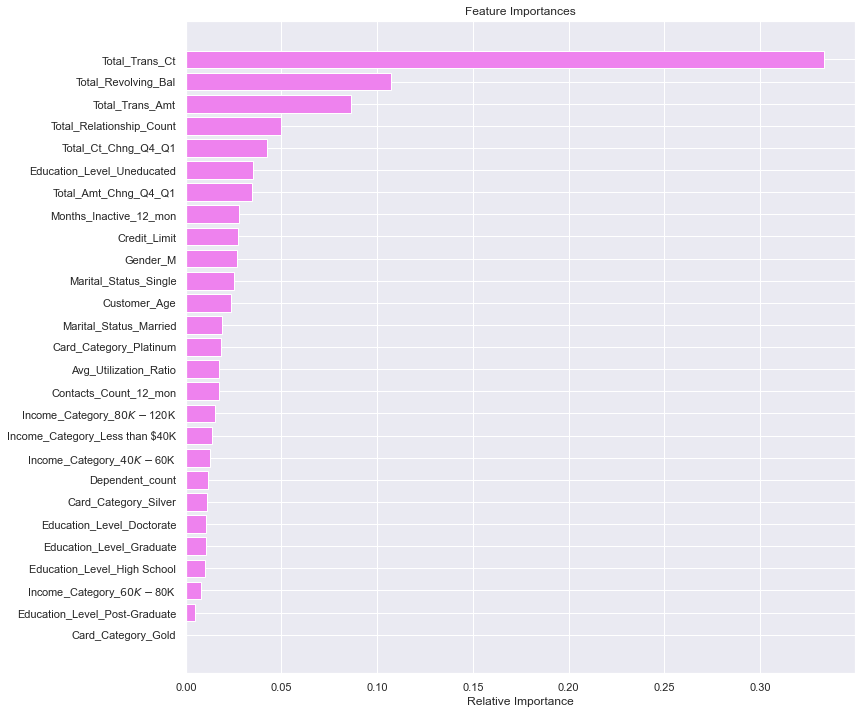

In [415]:
draw_feature_importances(xgb_tuned1)

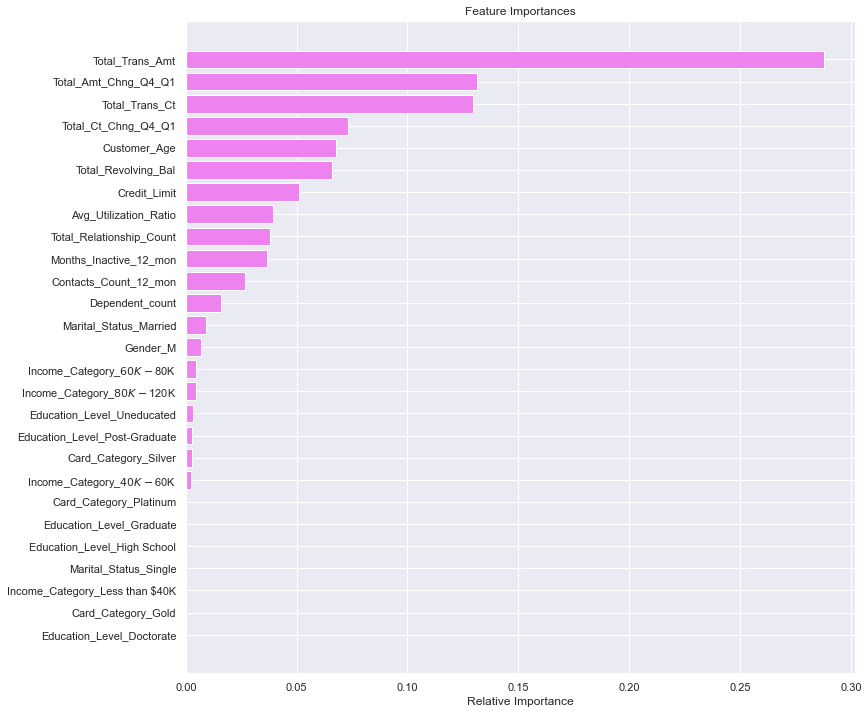

In [416]:
draw_feature_importances(adb_tuned1)

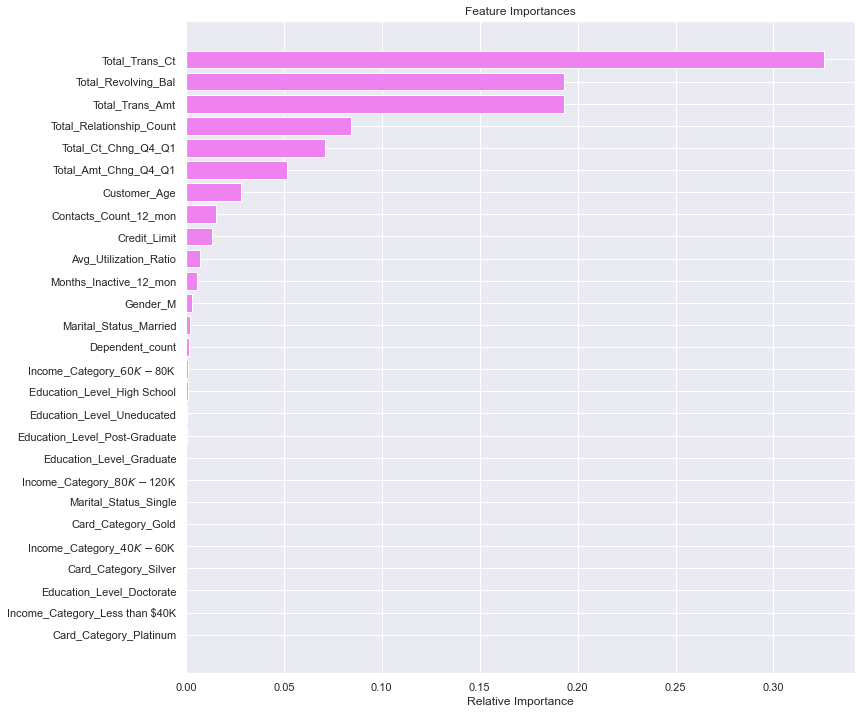

In [417]:
draw_feature_importances(gb_tuned2)

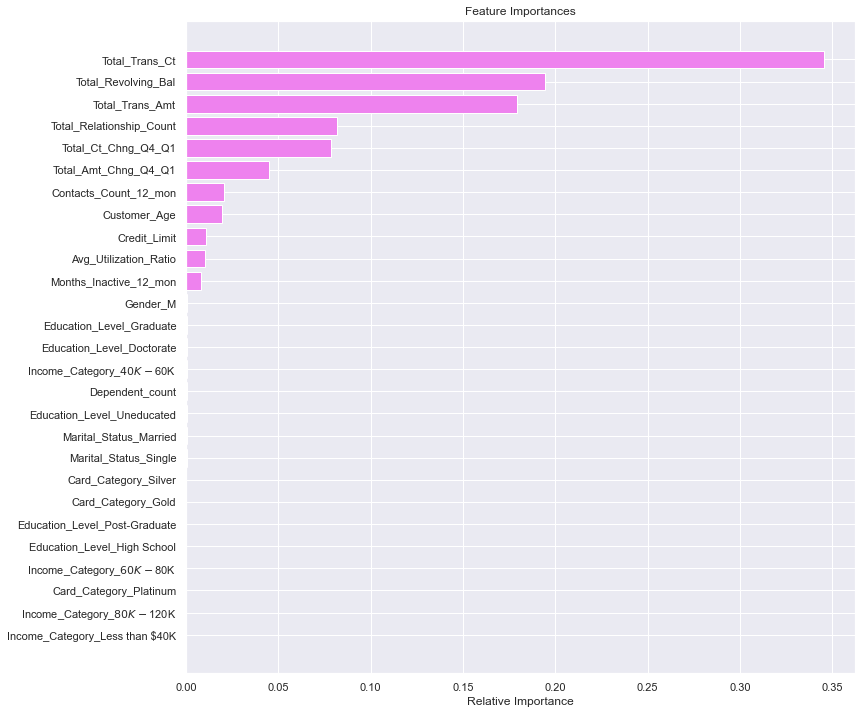

In [418]:
draw_feature_importances(gb_tuned1)

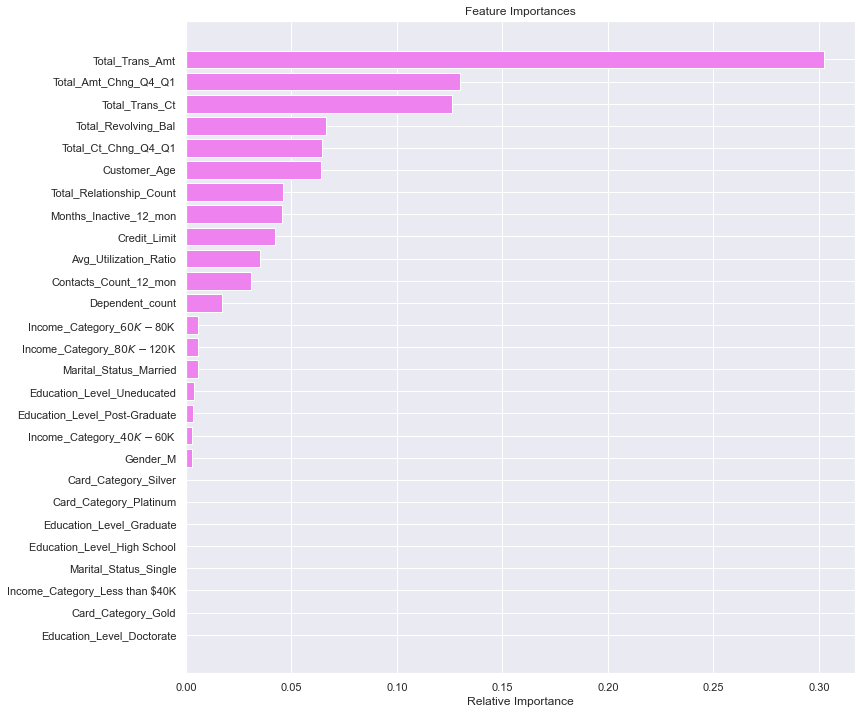

In [419]:
draw_feature_importances(adb_tuned2)

## Business Recommendations & Insights

- The best test recall is  around 96% but the test precision is low  (around 69%). This means that the model(XGBoost RandomSearchCV) is though very good at identifying false negatives, but the precision is not that great.   
- The AdaBoost model with GridSearch has got a very good precision and recall. The bank should use this model when it comes to looking for customers who are planning to leave.
- We saw from our analysis that customers with lower total_trans_amt and total_trans_ct are leaving the bank compared to other. The bank needs to ensure that they provide offers to them and make them spend more.
- Customers who are inactive for the last 12 month or who contact the bank quite often are more likely to leave compared to others. 
- We saw that customers who have lesser average utilization ratio, lesser total revolving balance are expected to leave compared to others..
- Our analysis showed that, total transaction amount and total transaction count are one of the key features that needs to be looked at. All the models are predicting that the total transaction amount and the total transaction count as one of the key features when it comes to customers leaving the bank